<a href="https://colab.research.google.com/github/a-m-andrushko/Sandpile/blob/main/PF2_sandpile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Samoorganizująca się krytyczność: model pryzmy piasku
Monika Marek \\
Anna-Mariia Andrushko

\\

## Cel ćwiczenia

Celem ćwiczenia jest zbadanie zjawiska samoorganizującej się krytyczności przy użyciu symulacji modelu pryzmy piachu. Dodatkowo zbadano rozkłady prawdopodobieństwa wielkości lawin $S$ i obszaru lawin $A$ dla różnych rozmiarów systemu.


## Teoria

Na siatce o rozmiarze $L \times L$ liczbę ziaren na polu $x$, $y$ oznacza się jako $Z(x, y)$. W kolejnych krokach za każdym razem wybiera się losowo pole, do którego dodawane jest ziarno: \\
$Z(x, y) → Z(x, y) + 1$. \\

Kiedy dane miejsce staje się niestabilne, pojawia się lawina. Niestabilność określa zasada: \\
$Z(x, y) ≥ Z_c$,
gdzie $Z_c$ to wartość krytyczna.

W takim wypadku: \\
$Z(x, y) → Z(x, y) − 4$

oraz \\

$Z(x ± 1, y) → Z(x ± 1, y) + 1$,

$Z(x, y ± 1) → Z(x, y ± 1) + 1$.

Po opisanej powyżej redystrybucji ziaren może się okazać, że na kolejnych polach liczba ziaren przekracza wartoć krytyczną, i wtedy następuje kolejna lawina, aż wszystkie pola będą stabilne.

Wielkość lawiny $S$ oznacza liczbę komórek, w których dokonano redystrybucji ziaren, a obszar lawiny $A$ to całkowity obszar, jaki dana lawina objeła, czyli liczba komórek, które przynajmniej raz dokonały redystrybujcji.


## Wykonanie ćwiczenia

W ćwiczeniu użyto trzech siatek o różnych rozmiarach: $20 \times 20$, $50 \times 50$ i $100 \times 100$. Dla każdej z nich wykonano $100 000$ losowań, czyli iteracji pętli zawartej w funkcji $sandpile$. Przy każdej iteracji ziarenko spadało na wylosowane miejsce w siatce. W przypadku, gdy liczba ziarenek na danym miejscu przekraczała wartość krytyczną $Z_c = 5$, to rozpoczynała się lawina opisana funkcją $avalanche$. W takim wypadku dane miejsce na siatce traciło $4$ ziarenka, które trafiały do sąsiednich komórek. W przypadku, gdy takie ziarenko trafiało na komórkę w siatce, w której liczba ziarenek również przekraczała wartość krytyczną, lawina rozpoczynała się ponownie, aż w końcu wszystkie komórki siatki miały liczbę ziarenek mniejszą od $Z_c$. Gdy ziarenko miało spaść na komórkę poza siatką, to zwyczajnie było ono tracone (dysypacja). Przy każdej pętli liczono obszar lawiny $A$ i jej wielkość $S$, a także sumaryczną liczbę ziarenek, które pozostały na planszy.

W kodzie wykorzystano również pakiet numba, który znacząco przyspiesza obliczenia.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import numba as nb

In [ ]:
@nb.njit
def avalanche(siatka, x, y, Z_c, s, a):
    s[0]=s[0]+1
    siatka[y, x]=siatka[y, x]-4
    check=False
    for i in range(a.shape[0]):
        if a[i][0] == y and a[i][1] == x:
            check = True
            break
    if not check:
        new_a = np.empty((a.shape[0] + 1, 2), dtype=a.dtype)
        new_a[:a.shape[0], :] = a
        new_a[a.shape[0], :] = [y, x]
        a = new_a
    if(y+1!=siatka.shape[0]):
      siatka[y+1, x]+=1
      if (siatka[y+1, x]>=Z_c):
        a=avalanche(siatka, x, y+1, Z_c, s, a)
    if(y-1!=-1):
      siatka[y-1, x]+=1
      if (siatka[y-1, x]>=Z_c):
        a=avalanche(siatka, x, y-1, Z_c, s, a)
    if(x+1!=siatka.shape[1]):
      siatka[y, x+1]+=1
      if (siatka[y, x+1]>=Z_c):
        a=avalanche(siatka, x+1, y, Z_c, s, a)
    if(x-1!=-1):
      siatka[y, x-1]+=1
      if (siatka[y, x-1]>=Z_c):
        a=avalanche(siatka, x-1, y, Z_c, s, a)
    return a

In [ ]:
ilosc_losowan = 100000

def sandpile(ilosc_losowan, siatka):
  Z_c = 5 # krytyczna liczba ziaren w komórce
  A=np.array([])
  S=np.array([])
  ziarenka=np.array([])
  for i in range (ilosc_losowan):
    s = np.array([0])
    a = np.array([[1000, 1000]]) # dummy element
    y = random.randint(0, siatka.shape[0]-1)
    x = random.randint(0, siatka.shape[1]-1)
    siatka[y, x] += 1
    if (siatka[y, x] >= Z_c):
      a=avalanche(siatka, x, y, Z_c, s, a)

    S=np.append(S, s[0])
    A=np.append(A, a.shape[0]-1)
    ziarenka=np.append(ziarenka, np.sum(siatka))
  return A, S, ziarenka

siatka_20 = np.zeros((20, 20))
A_20, S_20, ziarenka_20 = sandpile(ilosc_losowan, siatka_20)

siatka_50 = np.zeros((50, 50))
A_50, S_50, ziarenka_50 = sandpile(ilosc_losowan, siatka_50)

siatka_100 = np.zeros((100, 100))
A_100, S_100, ziarenka_100 = sandpile(ilosc_losowan, siatka_100)


## Zależność liczby ziaren w siatce od czasu trwania symulacji

Wszystkie siatki zostały przeanalizowane pod takim samym kątem. W pierwszej kolejności zbadano, jak zmienia się liczba ziaren w siatce w trakcie trwania symulacji.

Jak pokazuje uzyskany wykres, po pewnym czasie liczba ziaren osiągnęła prawie wartość stałą z niewielkimi fluktuacjami. Naturalnie, dla siatki o większym rozmiarze (100×100) stan ustabilizowania się liczby ziaren następuje później niż dla siatki o mniejszym rozmiarze (20×20).

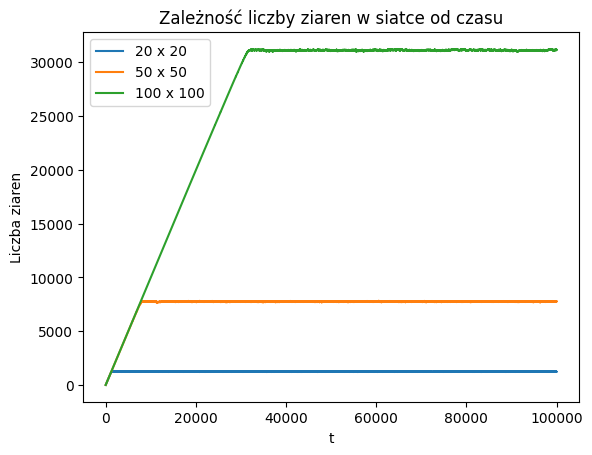

In [ ]:
x_20 = np.arange(0, len(ziarenka_20))
plt.plot(x_20, ziarenka_20, label = "20 x 20")

x_50 = np.arange(0, len(ziarenka_50))
plt.plot(x_50, ziarenka_50, label = "50 x 50")

x_100 = np.arange(0, len(ziarenka_100))
plt.plot(x_100, ziarenka_100, label = "100 x 100")

plt.xlabel("t")
plt.ylabel("Liczba ziaren")
plt.title("Zależność liczby ziaren w siatce od czasu")
plt.legend()

## Rozkłady prawdopodobieństwa obszaru $A$ i wielkości $S$ lawin

Następnie zbadano rozkłady prawdopodobieństwa lawin o powierzchni $A$ i rozmiarze $S$, gdzie prawdopodobieństwo wystąpienia lawiny o danym $A$ czy $S$ zostało określone poprzez funkcję $np.unique$ znormalizowaną liczbą wszystkich wartości w tablicach odpowiednio $A$ i $S$. Do badania rozkładów prawdopodobieństwa brano tylko te części tablic $A$ i $S$, które były dodawane w trakcie stanu ustabilizowania się liczby ziaren, który został pokazany wyżej.

Zarówno dla $A$ jak i dla $S$ uzyskano zależność − im większy rozmiar lub obszar lawiny, tym mniejsze prawdopodobieństwo jej zajścia. Co znowu jest zgodne z intuicją, gdyż powstanie dużej lawiny na wskutek opadnięcia jednego bądź kilku ziaren statystycznie jest mało prawdopodobne.

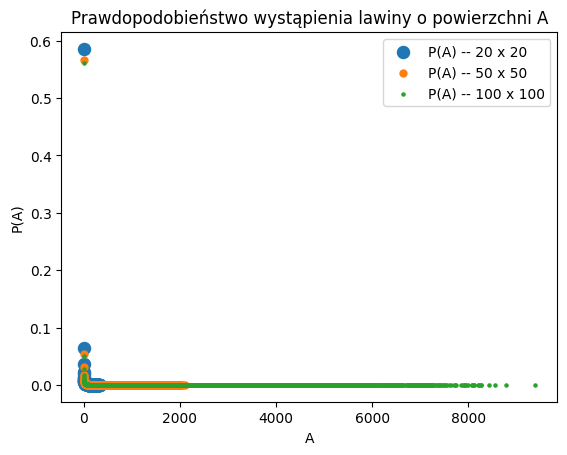

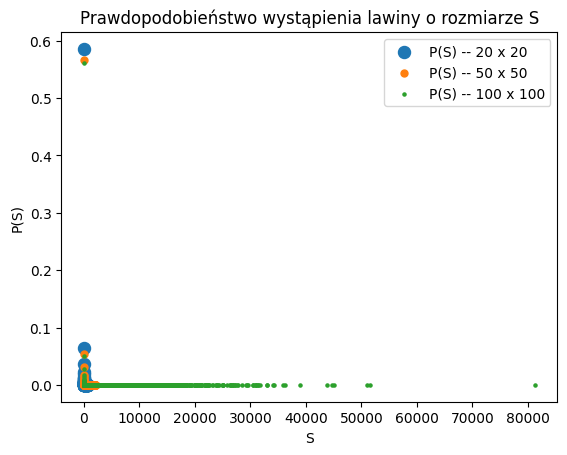

In [ ]:
A_20=A_20[1000:]
S_20=S_20[1000:]

A_50=A_50[10000:]
S_50=A_50[10000:]

A_100=A_100[40000:]
S_100=S_100[40000:]
elements, counts = np.unique(A_20, return_counts=True)
counts = counts/len(A_20)
P_A_20 = dict(zip(elements, counts))

elements, counts = np.unique(S_20, return_counts=True)
counts = counts/len(S_20)
P_S_20 = dict(zip(elements, counts))

elements, counts = np.unique(A_50, return_counts=True)
counts = counts/len(A_50)
P_A_50 = dict(zip(elements, counts))

elements, counts = np.unique(S_50, return_counts=True)
counts = counts/len(S_50)
P_S_50 = dict(zip(elements, counts))

elements, counts = np.unique(A_100, return_counts=True)
counts = counts/len(A_100)
P_A_100 = dict(zip(elements, counts))

elements, counts = np.unique(S_100, return_counts=True)
counts = counts/len(S_100)
P_S_100 = dict(zip(elements, counts))

plt.scatter(P_A_20.keys(), P_A_20.values(), s = 75, label = "P(A) -- 20 x 20")
plt.scatter(P_A_50.keys(), P_A_50.values(), s = 25, label = "P(A) -- 50 x 50")
plt.scatter(P_A_100.keys(), P_A_100.values(), s = 5, label = "P(A) -- 100 x 100")
plt.xlabel("A")
plt.ylabel("P(A)")
plt.legend()
plt.title("Prawdopodobieństwo wystąpienia lawiny o powierzchni A")
plt.show()

plt.scatter(P_S_20.keys(), P_S_20.values(), s = 75, label = "P(S) -- 20 x 20")
plt.scatter(P_S_50.keys(), P_S_50.values(), s = 25, label = "P(S) -- 50 x 50")
plt.scatter(P_S_100.keys(), P_S_100.values(), s = 5, label = "P(S) -- 100 x 100")
plt.xlabel("S")
plt.ylabel("P(S)")
plt.legend()
plt.title("Prawdopodobieństwo wystąpienia lawiny o rozmiarze S")
plt.show()

## Zlogarytmowanie rozkładów prawdopodobieństwa

Uzyskane rozkłady prawdopodobieństwa przekształcono w skalę logarytmiczno-logarytmiczną o podstawie 2.

Z reprezentacji tej można wywnioskować, że w siatkach większych rozmiarów następuje więcej lawin oraz że liczebność lawin o większych $A$ i $S$ jest znacznie większa niż dla małych wartości rozmiarów siatek.

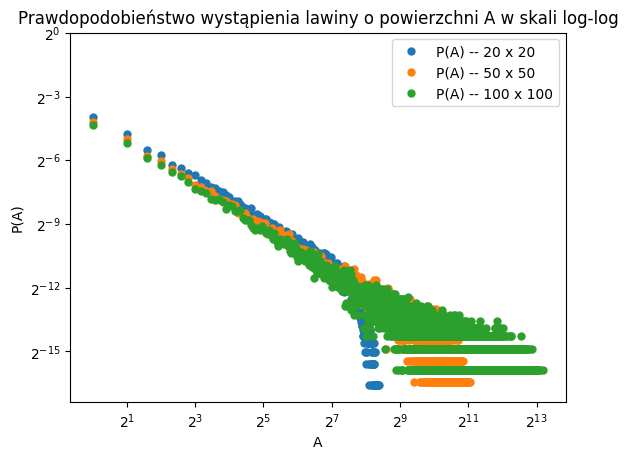

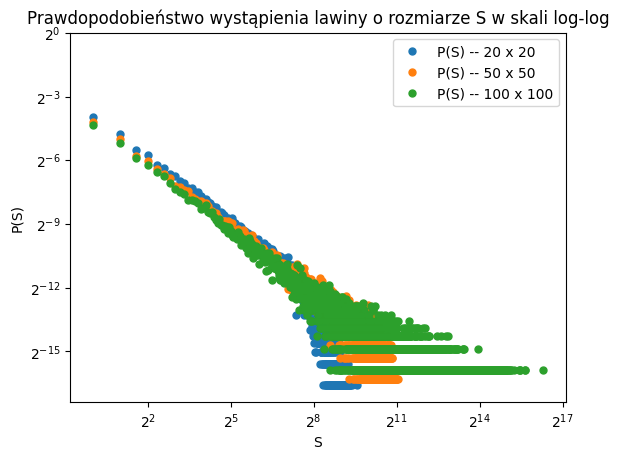

In [ ]:
plt.plot(P_A_20.keys(), P_A_20.values(), 'o', markersize=5, label = "P(A) -- 20 x 20")
plt.plot(P_A_50.keys(), P_A_50.values(), 'o', markersize=5, label = "P(A) -- 50 x 50")
plt.plot(P_A_100.keys(), P_A_100.values(), 'o', markersize=5, label = "P(A) -- 100 x 100")
plt.xlabel("A")
plt.ylabel("P(A)")
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.legend()
plt.title("Prawdopodobieństwo wystąpienia lawiny o powierzchni A w skali log-log")
plt.show()

plt.plot(P_S_20.keys(), P_S_20.values(), 'o', markersize=5, label = "P(S) -- 20 x 20")
plt.plot(P_S_50.keys(), P_S_50.values(), 'o', markersize=5, label = "P(S) -- 50 x 50")
plt.plot(P_S_100.keys(), P_S_100.values(), 'o', markersize=5, label = "P(S) -- 100 x 100")
plt.xlabel("S")
plt.ylabel("P(S)")
plt.legend()
plt.title("Prawdopodobieństwo wystąpienia lawiny o rozmiarze S w skali log-log")
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.show()

## Binowanie rozkładów prawdopodobieństwa

Kolejnym krokiem było binowanie pokazanych wyżej rozkładów, czyli uśrednianie wszystkich punktów dla wartości $A$ i $S$ zawierających się w jednej dekadzie do jednego punktu poprzez obliczenie średniej arytmetycznej (podzielenia sumy punktów przez ich liczbę). W wyniku uśredniania uzyskano tendencje liniowe, do których zostały dopasowane proste. Współczynniki nachylenia wszystkich prostych oscylują wokół wartości $\approx -1$, co jest zbliżone do wartości teoretycznej $-1.1$ przedstawionej w artykule [1], którą spodziewano się uzyskać.

Otrzymane wyniki w zależności od wielkości siatki:

$\tau_{a20\times20}= -0.94$

$\tau_{a50\times50}= -0.98$

$\tau_{a100\times100}= -1.02$

$\tau_{s20\times20}= -0.92$

$\tau_{s50\times50}= -0.96$

$\tau_{s100\times100}= -1.01$

gdzie $\tau_a$ oznacza współczynnik nachylenia prostej dopsowanej do zbinowanego rozkładu prawdopodobieństwa wystąpienia lawiny o danej powierzchni, a $\tau_s$ oznacza współczynnik nachylenia prostej dopsowanej do zbinowanego rozkładu prawdopodobieństwa wystąpienia lawiny o danym rozmiarze. Jak można zauważyć najbliżej wartości teoretycznej znajdują się nachylenia dla większych siatek $100\times100$.

In [ ]:
# UŚREDNIANIE
def bin_average(stop, P):
  power = 0
  suma = 0
  count = 0
  P_avg = {}
  for i in range(0, stop, 1): # (stop) -- LICZBA ULEGA ZMIANIE W ZALEŻNOŚCI OD DŁUGOŚCI PRZEDZIAŁU A
    if i <= 2 ** power:
      if i in P:
        suma = suma + P[i]
        count = count + 1
      else:
        suma = suma + 0
        count = count + 1
    else:
      P_avg[2 ** power] = suma / count
      suma = 0
      count = 0
      if i in P:
        suma = suma + P[i]
        count = count + 1
      else:
        suma = suma + 0
        count = count + 1
      power = power + 1

  return P_avg

P_avg_A_20= bin_average(1000, P_A_20)
P_avg_S_20= bin_average(1000, P_S_20)
P_avg_A_50= bin_average(2500, P_A_50)
P_avg_S_50= bin_average(2500, P_S_50)
P_avg_A_100= bin_average(10000, P_A_100)
P_avg_S_100= bin_average(10000, P_S_100)

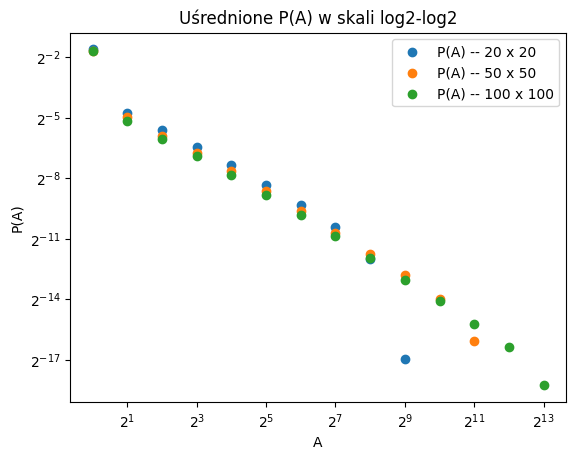

In [ ]:
plt.scatter(P_avg_A_20.keys(), P_avg_A_20.values(), label = "P(A) -- 20 x 20")
plt.scatter(P_avg_A_50.keys(), P_avg_A_50.values(), label = "P(A) -- 50 x 50")
plt.scatter(P_avg_A_100.keys(), P_avg_A_100.values(), label = "P(A) -- 100 x 100")
plt.xscale("log", base = 2)
plt.yscale("log", base = 2)
plt.xlabel("A")
plt.ylabel("P(A)")
plt.title("Uśrednione P(A) w skali log2-log2")
plt.legend()

tau_a dla siatki 20x20= -1.005332542407626
tau_a dla siatki 50x50= -0.9952944361528255
tau_a dla siatki 100x100= -1.022276577801801


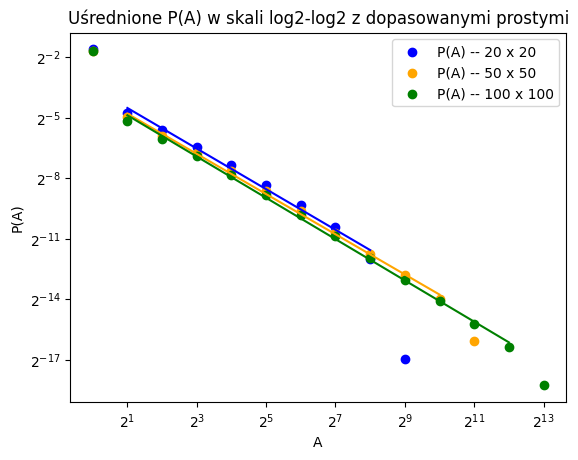

In [ ]:
# DOPASOWANIE DO A
# 20 x 20
keys = list(P_avg_A_20.keys())[1:-1]
values = [P_avg_A_20[key] for key in keys]

coefficients = np.polyfit(np.log2(keys), np.log2(values), 1)
fitted_line = np.polyval(coefficients, np.log2(keys))
print("tau_a dla siatki 20x20= {}".format(coefficients[0]))
plt.scatter(P_avg_A_20.keys(), P_avg_A_20.values(), color = "blue", label = "P(A) -- 20 x 20")
plt.plot(keys, 2**fitted_line, color = "blue")

# 50 x 50
keys = list(P_avg_A_50.keys())[1:-1]
values = [P_avg_A_50[key] for key in keys]

coefficients = np.polyfit(np.log2(keys), np.log2(values), 1)
fitted_line = np.polyval(coefficients, np.log2(keys))
print("tau_a dla siatki 50x50= {}".format(coefficients[0]))
plt.scatter(P_avg_A_50.keys(), P_avg_A_50.values(), color = "orange", label = "P(A) -- 50 x 50")
plt.plot(keys, 2**fitted_line, color = "orange")

# 100 x 100
keys = list(P_avg_A_100.keys())[1:-1]
values = [P_avg_A_100[key] for key in keys]

coefficients = np.polyfit(np.log2(keys), np.log2(values), 1)
fitted_line = np.polyval(coefficients, np.log2(keys))
print("tau_a dla siatki 100x100= {}".format(coefficients[0]))
plt.scatter(P_avg_A_100.keys(), P_avg_A_100.values(), color = "green", label = "P(A) -- 100 x 100")
plt.plot(keys, 2**fitted_line, color = "green")

plt.xlabel("A")
plt.ylabel("P(A)")
plt.title("Uśrednione P(A) w skali log2-log2 z dopasowanymi prostymi")
plt.xscale("log", base = 2)
plt.yscale("log", base = 2)
plt.legend()
plt.show()

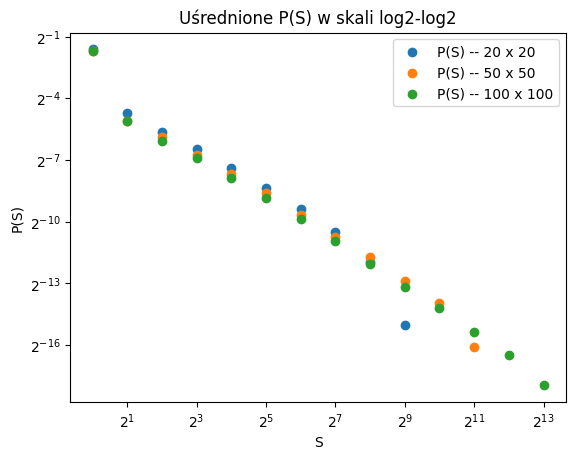

In [ ]:
plt.scatter(P_avg_S_20.keys(), P_avg_S_20.values(), label = "P(S) -- 20 x 20")
plt.scatter(P_avg_S_50.keys(), P_avg_S_50.values(), label = "P(S) -- 50 x 50")
plt.scatter(P_avg_S_100.keys(), P_avg_S_100.values(), label = "P(S) -- 100 x 100")
plt.xscale("log", base = 2)
plt.yscale("log", base = 2)
plt.xlabel("S")
plt.ylabel("P(S)")
plt.title("Uśrednione P(S) w skali log2-log2")
plt.legend()

tau_s dla siatki 20x20= -1.010537094804548
tau_s dla siatki 50x50= -0.9959197149381275
tau_s dla siatki 100x100= -1.0305117619159192


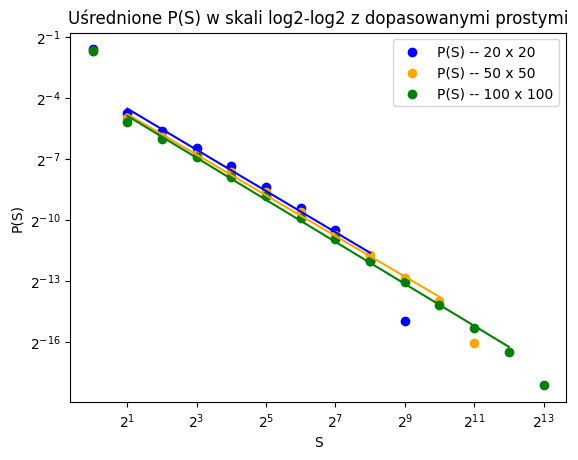

In [ ]:
# DOPASOWANIE DO S
# 20 x 20
keys = list(P_avg_S_20.keys())[1:-1]
values = [P_avg_S_20[key] for key in keys]

coefficients = np.polyfit(np.log2(keys), np.log2(values), 1)
fitted_line = np.polyval(coefficients, np.log2(keys))

plt.scatter(P_avg_S_20.keys(), P_avg_S_20.values(), color = "blue", label = "P(S) -- 20 x 20")
plt.plot(keys, 2**fitted_line, color = "blue")
print("tau_s dla siatki 20x20= {}".format(coefficients[0]))
# 50 x 50
keys = list(P_avg_S_50.keys())[1:-1]
values = [P_avg_S_50[key] for key in keys]

coefficients = np.polyfit(np.log2(keys), np.log2(values), 1)
fitted_line = np.polyval(coefficients, np.log2(keys))
print("tau_s dla siatki 50x50= {}".format(coefficients[0]))
plt.scatter(P_avg_S_50.keys(), P_avg_S_50.values(), color = "orange", label = "P(S) -- 50 x 50")
plt.plot(keys, 2**fitted_line, color = "orange")

# 100 x 100
keys = list(P_avg_S_100.keys())[1:-1]
values = [P_avg_S_100[key] for key in keys]

coefficients = np.polyfit(np.log2(keys), np.log2(values), 1)
fitted_line = np.polyval(coefficients, np.log2(keys))
print("tau_s dla siatki 100x100= {}".format(coefficients[0]))
plt.scatter(P_avg_S_100.keys(), P_avg_S_100.values(), color = "green", label = "P(S) -- 100 x 100")
plt.plot(keys, 2**fitted_line, color = "green")

plt.xlabel("S")
plt.ylabel("P(S)")
plt.title("Uśrednione P(S) w skali log2-log2 z dopasowanymi prostymi")
plt.xscale("log", base = 2)
plt.yscale("log", base = 2)
plt.legend()
plt.show()

## Animacja

Poniżej wykonano animację pryzmy piachu dla siatki $20 \times 20$. Animacja zapisuje się w plikach.

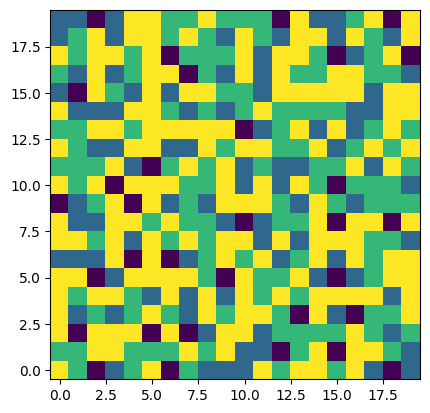

In [ ]:
#ANIMACJA ZAPISANA W PLIKACH
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation

siatka=np.zeros((20, 20))
ziarenka=[]
fig, ax = plt.subplots()
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
cmap = mcolors.ListedColormap(['white', 'blue'])
def animate(i) :
    Z_c = 5 # krytyczna liczba ziaren w komórce
    s = np.array([0])
    a = np.array([[1000,1000]])
    y = random.randint(0, siatka.shape[0]-1)
    x = random.randint(0, siatka.shape[1]-1)
    siatka[y, x] += 1
    if (siatka[y, x] >= Z_c):
      a=avalanche(siatka, x, y, Z_c, s, a)

    ax.clear()
    ax.imshow(siatka, origin='lower')

ani = FuncAnimation(fig, animate, np.arange(0, 1500), interval=100, blit=False)
ani.save('animation.gif', writer='pillow', fps=10)
plt.show()

## Wnioski

Napisano program do wykonania symulacji pryzmy piachu dla trzech siatek różnego rozmiaru. Wyniki symulacji zostały przeanalizowane pod kątem prawdopodobieństwa zajścia określonego zjawiska. Otrzymane rezultaty są zgodne z oczekiwaniami oraz danymi zamieszczonymi w publikacjach naukowych.

Zarówno dla rozkładu prawopodobieństwa zajścia lawiny o obszarze $A$  jak i dla rozkładu prawopodobieństwa zajścia lawiny o rozmiarze $S$  uzyskano zależność pokazującą, że im większy rozmiar lawiny, tym mniejsze prawdopodobieństwo jej zajścia.

Współczynniki nachylenia wszystkich prostych dopasowanych do zbinowanych rozkładów prawdopodobieństwa otrzymania lawiny o danym rozmiarze i powierzchni oscylują wokół wartości $\approx -1$, co jest zbliżone do wartości weoretycznej $-1.1$. Jak można zauważyć najbliżej tej wartości znajdują się nachylenia dla większych siatek $100\times100$ i wynoszą $\tau_{s100\times100}=−1.01$ i $\tau_{a100\times100}=−1.02$.

##Literatura
[1] Lecture notes for 12.086/12.586, Modeling Environmental Complexity
    D. H. Rothman, MIT
    September 22, 2014